In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
orders = pd.read_excel("Data.xlsx")

In [3]:
orders.head()

,Index,Symbol,Time,UPDATE_TYPE,ORDER_ID,BUY_SELL_FLAG,PRICE,SIZE,MMID,DELETED_TIME,TICK_STATUS,RECORD_TYPE,OMDSEQ
0,1,MS127::RY.127,2019/11/07 09:30:00.221,1,079-S20191107000000059,1,108.91,0,79.0,NaN,0,R,43
1,2,MS127::RY.127,2019/11/07 09:30:00.221,2,079-S20191107000000069,1,108.69,500,79.0,NaN,0,R,46
2,3,MS127::RY.127,2019/11/07 09:30:00.221,1,079-S20191107000000060,1,109.05,0,79.0,NaN,0,R,213
3,4,MS127::RY.127,2019/11/07 09:30:00.221,2,079-S20191107000000070,1,108.83,2500,79.0,NaN,0,R,214
4,5,MS127::RY.127,2019/11/07 09:30:04.657,2,007-B20191107000000008,0,108.25,100,7.0,NaN,0,R,1535


In [4]:
orders.shape

(1048575, 13)

In [5]:
orders=orders[orders["RECORD_TYPE"]=='R']

In [6]:
orders=orders.drop(columns=['Index', 'Symbol','UPDATE_TYPE','ORDER_ID','MMID','DELETED_TIME','TICK_STATUS','OMDSEQ','RECORD_TYPE'])

In [7]:
orders=orders[orders["SIZE"]!=0]

In [8]:
orders=orders[orders["PRICE"]!=0]

In [9]:
orders.head()

,Time,BUY_SELL_FLAG,PRICE,SIZE
1,2019/11/07 09:30:00.221,1,108.69,500
3,2019/11/07 09:30:00.221,1,108.83,2500
4,2019/11/07 09:30:04.657,0,108.25,100
8,2019/11/07 09:30:04.657,0,108.25,400
10,2019/11/07 09:30:04.657,0,108.25,100


In [10]:
o_tstamps = orders.Time.values
o_unique = set(o_tstamps)
print(len(o_unique))

297437


In [11]:
print("total bid orders: ", orders[orders['BUY_SELL_FLAG'] == 0]['BUY_SELL_FLAG'].count())
print("total ask orders: ", orders[orders['BUY_SELL_FLAG'] == 1]['BUY_SELL_FLAG'].count())

total bid orders:  266463
total ask orders:  268620


In [12]:
BidPrice = orders[orders['BUY_SELL_FLAG'] == 0]['PRICE']
AskPrice = orders[orders['BUY_SELL_FLAG'] == 1]['PRICE']
BidVol = orders[orders['BUY_SELL_FLAG'] == 0]['SIZE']
AskVol = orders[orders['BUY_SELL_FLAG'] == 1]['SIZE']

/Users/gurgenblbulyan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


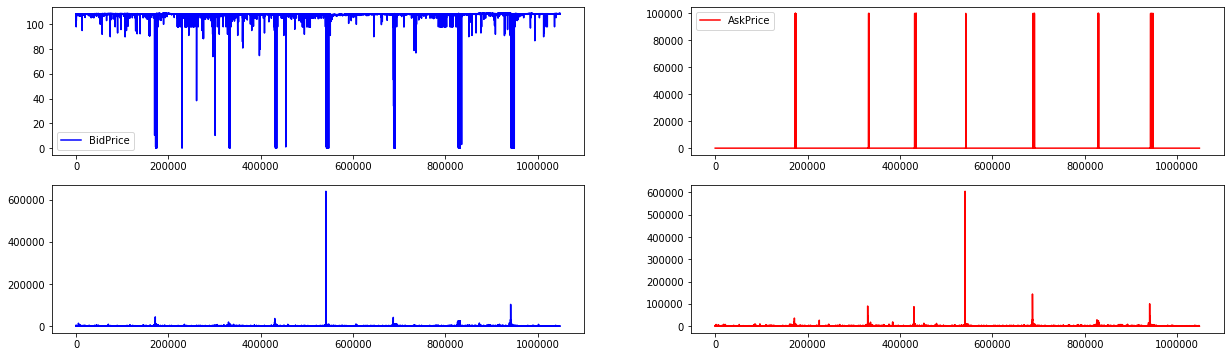

In [13]:
plt.figure(figsize=(21,6))
plt.subplot(2,2,1)
plt.plot(BidPrice ,color='b', label='BidPrice')
plt.legend()
plt.subplot(2,2,2)
plt.plot(AskPrice, color='r', label='AskPrice')
plt.legend()
plt.subplot(2,2,3)
plt.plot(BidVol, color='b', label='BidVol')
plt.subplot(2,2,4)
plt.plot(AskVol, color='r', label='AskVol')
plt.show()

In [14]:
def reject_outliers(data, m = 5):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev
    return data[s<m]

In [15]:
BP=reject_outliers(BidPrice)
AP=reject_outliers(AskPrice)


/Users/gurgenblbulyan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


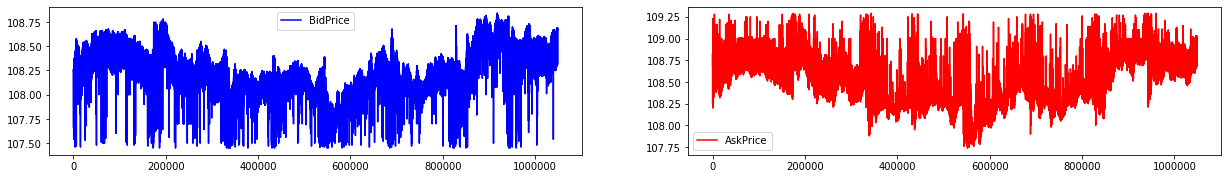

In [18]:
plt.figure(figsize=(21,6))
plt.subplot(2,2,1)
plt.plot(BP ,color='g', label='BidPrice')
plt.legend()
plt.subplot(2,2,2)
plt.plot(AP, color='r', label='AskPrice')
plt.legend()



<IPython.core.display.Javascript object>


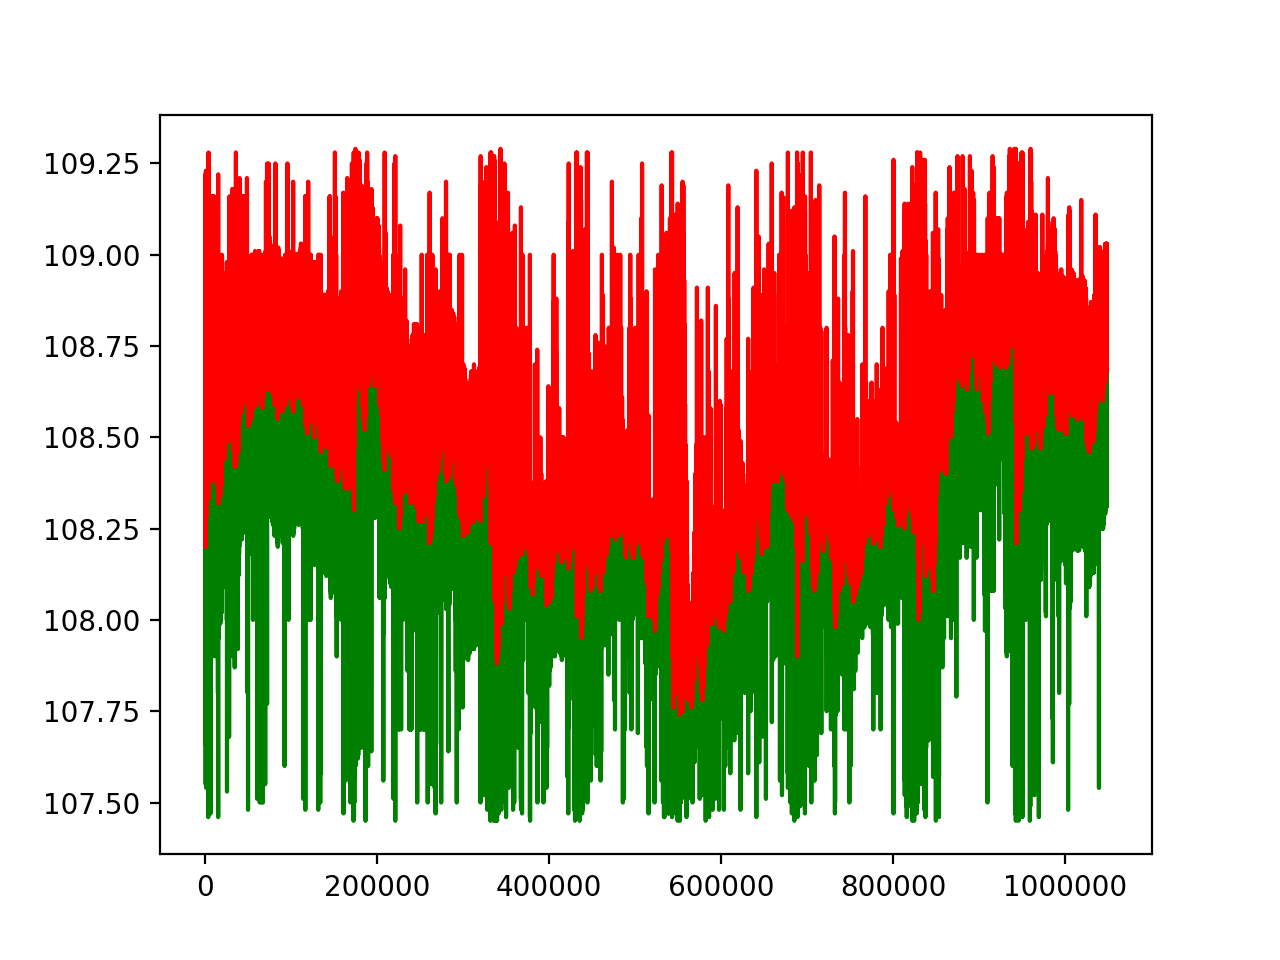

In [16]:
%matplotlib notebook
plt.plot(BP ,color='g', label='BidPrice')

plt.plot(AP, color='r', label='AskPrice')